In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
force_series = np.loadtxt('./f', usecols = (2, 3), skiprows=1, dtype=np.float32)
# force_val = force_series[:,1]
# time_val = force_series[:,0]
### for testing ###
cd_val = force_series[:,1]
time_norm_val = force_series[:,0]

t_max = np.max(time_norm_val)

time_val = np.loadtxt('./f', usecols = (0), skiprows=1, dtype=np.float32)

In [3]:
plt.style.use('seaborn')

<ipython-input-3-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


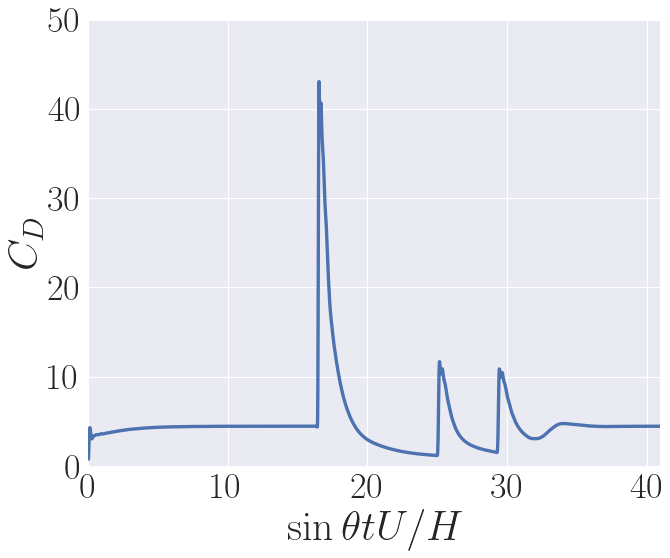

In [5]:
# a static plot for CD
# import seaborn

fig, ax = plt.subplots()
# plt.style.use('bmh')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.rcParams['figure.figsize'] = [10.25, 10.25]
# plt.rc('axes', labelsize=26)
# plt.rcParams['figure.figsize'] = [6.5, 6.8]
plt.xlim([0, t_max])
plt.ylim([0, 50])
plt.yticks(np.arange(0.0, (50.0+10), 10))
plt.xlabel(r'$\sin\theta t U/H$', fontsize = 42)
plt.ylabel(r'$C_D$', fontsize = 42)
plt.subplots_adjust(bottom=0.275)
plt.plot(time_norm_val, cd_val, linewidth=3.35)

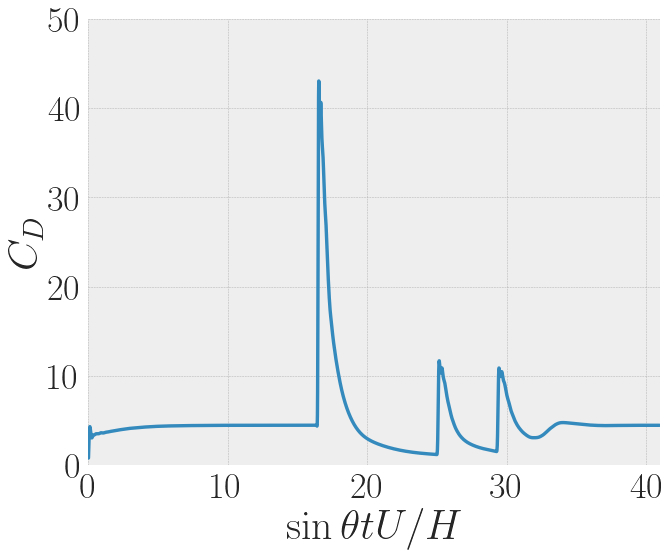

In [7]:
# dynamic CD plot
# import seaborn
import matplotlib
fig, ax = plt.subplots()
plt.style.use('bmh')
plt.rc('text', usetex=True)
ax.tick_params(axis='both', which='major', labelsize=36)
ax.tick_params(axis='both', which='minor', labelsize=36)
plt.rcParams['figure.figsize'] = [10.251, 10.251]
# plt.rcParams['figure.figsize'] = [6.5, 6.8]
plt.xlim([0, t_max])
plt.ylim([0, 50])
plt.yticks(np.arange(0.0, (50.0+10), 10))
plt.xlabel(r'$\sin\theta t U/H$', fontsize = 42)
plt.ylabel(r'$C_D$', fontsize = 42)
plt.subplots_adjust(bottom=0.275)
line, = ax.plot([], [], linewidth=3.4)
def update(num, time_norm_val, cd_val, time_val, line):
    plt.rc('text', usetex=True)
    ax.tick_params(axis='both', which='major', labelsize=36)
    ax.tick_params(axis='both', which='minor', labelsize=36)
    plt.rcParams['figure.figsize'] = [10.251, 10.251]
    plt.xlim([0, t_max])
    plt.ylim([0, 50])
    plt.yticks(np.arange(0.0, (50.0+10), 10))
    plt.xlabel(r'$\sin\theta t U/H$', fontsize = 42.)
    plt.ylabel(r'$C_D$', fontsize = 42.)
    plt.subplots_adjust(bottom=0.275)
    line.set_data(time_norm_val[:num], cd_val[:num])
    return line,

ani = animation.FuncAnimation(fig, update, len(time_norm_val), fargs=[time_norm_val, cd_val, time_val, line],
                              interval=2.0, blit=True)
# ani = animation.FuncAnimation(fig, update, 225, fargs=[time_norm_val, cd_val, line],
#                               interval=2.5, blit=True)
writer = matplotlib.animation.FFMpegWriter(fps=120, codec="h264", bitrate=600000, extra_args=["-preset", "veryslow","-crf","0"])
ani.save('cir_cd_seaborn.mp4', writer=writer, dpi=100)
plt.show()